In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adl-classification/dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import shap
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('../input/adl-classification/dataset.csv',names='1 2 3 4 5 6 target'.split())

In [4]:
data

,1,2,3,4,5,6,target
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [5]:
def preprocessor(df):
    df = df.copy()
    X = df.drop(['target'],axis=1)
    y = df['target']
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=True,random_state=2)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = preprocessor(data)
print('train size: ',X_train.shape, y_train.shape)
print('test size: ',X_test.shape, y_test.shape)

train size:  (1476, 6) (1476,)
test size:  (369, 6) (369,)


In [6]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print('acc: ',round(model.score(X_test,y_test),4))

acc:  0.9539


In [7]:
explainer = shap.TreeExplainer(model)

In [8]:
shap_values = explainer.shap_values(X_test)

In [9]:
model.classes_

array([1, 2, 3, 4])

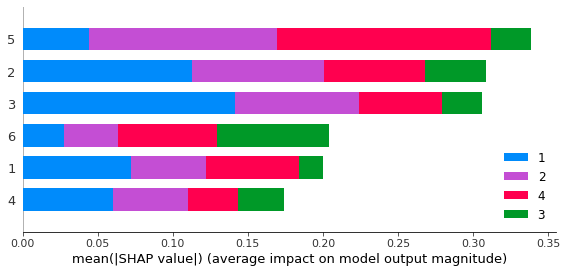

In [10]:
shap.summary_plot(shap_values,X_test,class_names=model.classes_)